### Plot Spectrogram

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Figures appear in notebook inline
%matplotlib inline


### Functions

In [2]:
def plot_spectrogram(y, ylim):
    """Plot the linear-frequency power spectrogram"""

    D = librosa.stft(y, n_fft=N_FFT, hop_length=HOP_LENGTH, win_length=WIN_LENGTH, window='hann')  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)    # STFT in dB
    
    # Plot
    librosa.display.specshow(S_db, sr=SR, hop_length=HOP_LENGTH, x_axis='s', y_axis='linear')
    plt.colorbar(format="%+2.f dB")
    plt.title('Linear-frequency Power Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(ylim)
    

### Constants

In [3]:
SR = 250                  # sample rate Hz
FRAME_DURATION = 1000    #  window duration in ms
FRAME_OVERLAP = 75           # window overlap %


In [4]:
# CALCULATED CONSTANTS (DO NOT CHANGE)
#------------------------------------------------------------------------------
FRAME_LENGTH = round(SR * FRAME_DURATION / 1000)    # frame length (samples)
HOP_LENGTH = round(FRAME_LENGTH *(100-FRAME_OVERLAP)/100) # hoplength (samples)
N_FFT = FRAME_LENGTH*1
WIN_LENGTH = FRAME_LENGTH


### Read .wav audio

In [5]:
# File path to .wav file
audio_file_path = r"C:\Users\james\OneDrive - Nexus365\Engineering\Year4\4YP\git\marine_acoustics\data\AcousticTrends_BlueFinLibrary\RossSea2014\wav\20140323_200000.wav"
filename = audio_file_path.split('/')[-1]

# Read entire mono .wav file using default sampling rate
y, sr = librosa.load(audio_file_path, sr=SR, mono=True, offset=0.0, duration=None)
print(f'Loaded file: {filename}\n' + '-'*30 + f'\nDuration: {y.size/sr} seconds\n' + '-'*30 + f'\nSample rate: {sr} Hz\n' + '-'*30)


Loaded file: C:\Users\james\OneDrive - Nexus365\Engineering\Year4\4YP\git\marine_acoustics\data\AcousticTrends_BlueFinLibrary\RossSea2014\wav\20140323_200000.wav
------------------------------
Duration: 3600.004 seconds
------------------------------
Sample rate: 250 Hz
------------------------------


### View call log

In [6]:
# File path to log file
log_filepath = r"C:\Users\james\OneDrive - Nexus365\Engineering\Year4\4YP\git\marine_acoustics\data\AcousticTrends_BlueFinLibrary\RossSea2014\RossSea2014.Bm.Ant-A.selections.txt"
log_filename = log_filepath.split('\\')[-1]
print(f'Loaded file: {log_filename}\n')

fields = ['Begin File', 'End File','Begin Time (s)', 'End Time (s)',
              'Beg File Samp (samples)', 'End File Samp (samples)',
              'Begin Date Time', 'Delta Time (s)', 'Low Freq (Hz)',
              'High Freq (Hz)', 'Dur 90% (s)', 'Freq 5% (Hz)', 'Freq 95% (Hz)']

    
df_log = pd.read_csv(log_filepath, sep='\t', usecols=fields)

df_log.head(4)


Loaded file: RossSea2014.Bm.Ant-A.selections.txt



,Begin File,End File,Begin Time (s),End Time (s),Beg File Samp (samples),End File Samp (samples),Begin Date Time,Delta Time (s),Low Freq (Hz),High Freq (Hz),Dur 90% (s),Freq 5% (Hz),Freq 95% (Hz)
0,20140323_200000.wav,20140323_200000.wav,86385.474,86391.826,13432,19784,2014/3/23 20:00:13.474,6.352,24.1,27.7,5.9,24.4,27.3
1,20140323_200000.wav,20140323_200000.wav,86401.486,86406.978,29444,34936,2014/3/23 20:00:29.486,5.492,23.6,28.2,4.3,24.4,27.3
2,20140323_200000.wav,20140323_200000.wav,86430.467,86438.871,58425,66829,2014/3/23 20:00:58.467,8.404,23.8,28.5,7.5,24.4,28.3
3,20140323_200000.wav,20140323_200000.wav,86454.288,86457.927,82246,85885,2014/3/23 20:01:22.288,3.639,23.8,27.7,2.9,24.4,27.3


### Plot a linear-frequency power spectrogram

Frequency resolution 1.0 Hz per bin
Time resolution 1000.0 ms



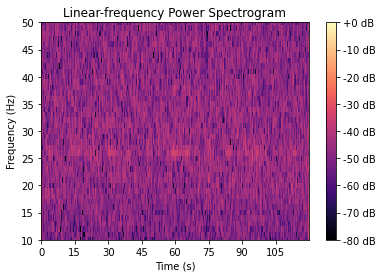

In [7]:
# Select a slice of the audio (seconds)
t_start = 0
t_end = 120

# Select y axis limits
ylim = [10, 50]

plot_spectrogram(y[sr*t_start:sr*t_end], ylim)

print(f'Frequency resolution {sr/N_FFT:.1f} Hz per bin')
print(f'Time resolution {1000*WIN_LENGTH/sr:.1f} ms\n')
